matplotlib website:https://matplotlib.org 

Check out
  the [gallery](http://matplotlib.org/gallery.html), [examples](http://matplotlib.org/examples/index.html)
  and some [learning  resources](http://matplotlib.org/resources/index.html)

First of all you have to tell Jupyter notebook that you want the figures shown `inline` (on the notebook)

In [1]:
%matplotlib inline

and now import `pyplot`, the module that provides the plotting framework.

In [2]:
import matplotlib.pyplot as plt

# Simple plot

In [3]:
# import numpy and generate some data
import numpy as np
x=np.linspace(0,6.28,25)
y1=0.2*x-1
y2=np.sin(x)

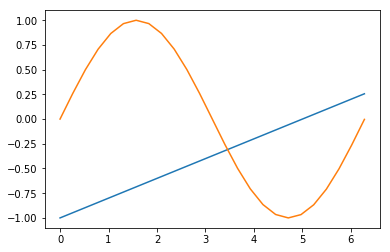

In [4]:
fig=plt.figure()          # create the figure
ax=fig.add_subplot(1,1,1) # generate a 1x1 grid, this plot is the first one
ax.plot(x,y1)             # plot one line on ax1
ax.plot(x,y2)             # another one


# Save the figure
Use the `fig.savefig(filename)` function. The format of the figure is determined from the filename extension


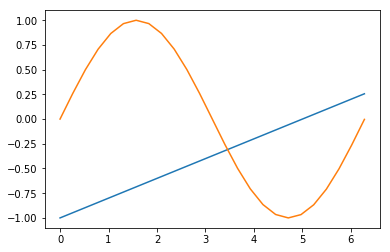

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y1)
ax.plot(x,y2)
fig.savefig("fig.png")
fig.savefig("fig.pdf")
fig.savefig("fig.eps")

## <span style="color:red">WARNING!!!</span>
When you save the plot with `savefig()` the plot is shown.
In some cases you just need to save the figure without showing it, for example if you want to make a lot of plots using a function.
In this case, you need to close the figure using `plt.close(fig)`

In the following example I will use the `os` module, that provide numerous tools to deal with filenames, paths, directories.

https://docs.python.org/3/library/os.html

In [6]:
import os

odir="test_figures" # name of the output directory
if not os.path.isdir(odir): # if odir is not a directory (if it does not exists)
    os.makedirs(odir)       # create it!
    
def makeThePlot(k):
    figname="%s/figure_%03d.png"%(odir,k) # name of the output file
    x=np.linspace(0,2*np.pi,200)
    y=np.sin(x*i)
    # function that make a 
    fig,ax=plt.subplots()
    ax.plot(x,y)
    fig.savefig(figname)
    plt.close(fig)  # try to comment this line!!

for i in range(1,30):
    makeThePlot(i)

In [7]:
# remove the directory
import shutil
shutil.rmtree(odir)

# lines
to change the linestyle, use the `ls` keyword:
* `"--"` : dashed
* `":"` : dotted
* `"-."` : dash-dot

the `c` keyword changes the color of the line.
Matplotlib recognizes the following formats to specify a color:
* an RGB tuple of 3 float values in [0, 1]; e.g., (0.1, 0.2, 0.5);
* an RGBA tuple of 4 float values in [0, 1] the last one set the transparency; e.g., (0.1, 0.2, 0.5, 0.6);
* a hex RGB or RGBA string (e.g., '#0F0F0F' or '#0F0F0F0F');
* one of {'b', 'g', 'r', 'c', 'm', 'y', 'k' (black), 'w'}

Set the `linewidth` with the keyword `ls`


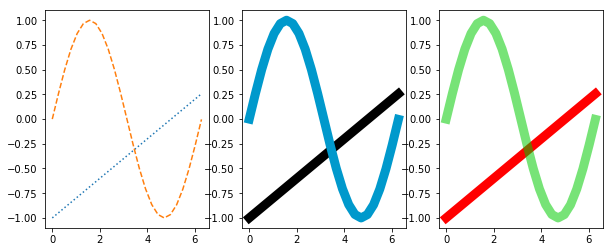

In [8]:
fig=plt.figure(figsize=(10,4))  # set the size of the figure
ax1=fig.add_subplot(1,3,1)      # generate a grid with one row,two cols, this plot is the first one
ax2=fig.add_subplot(132)        # this is the second one. you don't need the ","
ax3=fig.add_subplot(133)

ax1.plot(x,y1,ls=":")
ax1.plot(x,y2,ls="--")

ax2.plot(x,y1,lw=9,c="k")
ax2.plot(x,y2,lw=9,c="#0099cc")

ax3.plot(x,y1,lw=9,c="r")
ax3.plot(x,y2,lw=9,c="#00cc0088") # transparency!

## adding a legend

It is possible to add a `label` to each line to be used to add a `legend`

https://matplotlib.org/users/legend_guide.html

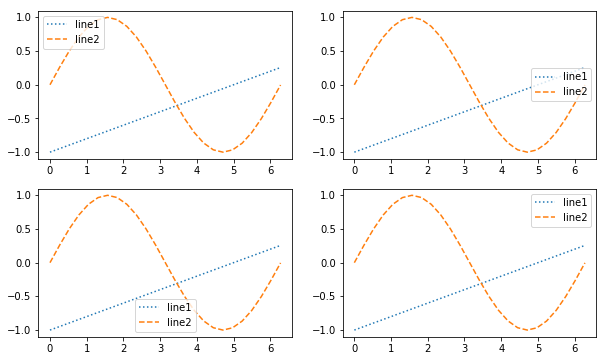

In [9]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

for ax in [ax1,ax2,ax3,ax4]:
    ax.plot(x,y1,ls=":" ,label="line1")
    ax.plot(x,y2,ls="--",label="line2")

ax1.legend(loc='upper left')
ax2.legend(loc='center right')
ax3.legend(loc='lower center')
ax4.legend() # the default is loc='best': try to find the best option!

## markers

By default, `ax.plot` connect the points with a line.
you can use markers to draw symbols instead. this is done using the `marker` keyword.
[Read the documentation](https://matplotlib.org/api/markers_api.html) to find all possible markers.

* `ms`  or `markersize` : marker size in points
* `mfc` or `markerfacecolor` : marker face color
* `mec` or `markeredgecol` : color of the edge
* `mew` or `markeredgewidth` : marker edge width in points
* `c`   or `color` : the color for simple markers (e.g., '.','+')


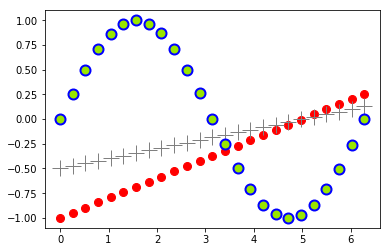

In [10]:
fig,ax=plt.subplots() # subplots return both the fig and one axes
ax.plot(x,y1  ,".",ms=16,c='r')
ax.plot(x,y1/2,"+",ms=16,c=(.5,.5,.5))
ax.plot(x,y2  ,"o",ms=10,mec="b",mfc=(.6,.9,0),mew=2)


#### <font color='red'>EXERCISE</font> : The value of $\pi$ using the Monte Carlo method

The circle of radius $R$ is inscribed inside a square with side length $2R$, then the area of the circle will be $\pi R^2$ and the area of the square will be $(2R)^2$. So the ratio of the area of the circle to the area of the square will be $\pi/4$.
This means that, if you pick $N$ points at random inside the square, approximately $N \pi/4$ of those points should fall inside the circle. 


* Define two arrays `x` and `y`, each with 1000 random numbers in the interval `[-1,1]`
* Select the points that are in the circle with $R=1$.
* plot all points and those in the circle using different symbols
* if N is the number of original points and M is the number of points inside the circle, calculate M/N*4



3.152


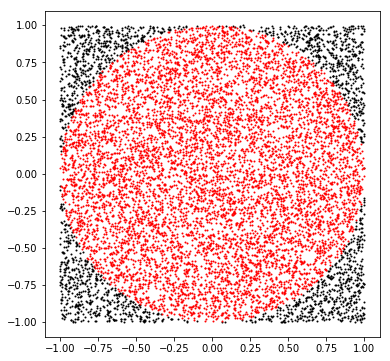

In [11]:
import numpy as np
fig,ax=plt.subplots(figsize=(6,6))
npts=10000
x=np.random.uniform(-1,1,npts)
y=np.random.uniform(-1,1,npts)

cond=(x**2+y**2)<=1
ax.plot(x[~cond],y[~cond],'.k',ms=2)
ax.plot(x[cond] ,y[cond] ,'.r',ms=2)

n_circle=cond.sum()
print (n_circle/npts*4)

# subplots
There are many ways to make subplots, we will see just a few examples:

## plt.subplots(n,m)
To define a grid of subplots with `n` rows and `m` columns. optionally it is possible to define the size of the figure
return a `Figure` and a `numpy array` with all subplots

<class 'numpy.ndarray'>


(2, 3)

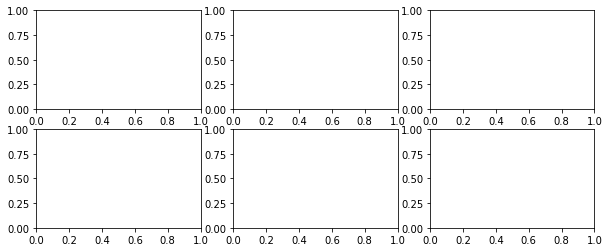

In [12]:
fig,axes=plt.subplots(2,3,figsize=(10,4))
print (type(axes))
axes.shape

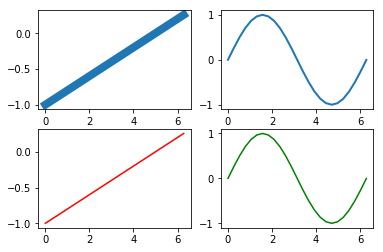

In [13]:
x=np.linspace(0,6.28,25)
y1=0.2*x-1
y2=np.sin(x)

fig,axes=plt.subplots(2,2)
axes[0,0].plot(x,y1,lw=8)  # row 0, col 0
axes[0,1].plot(x,y2,lw=2 ) # row 0, col 1
axes[1,0].plot(x,y1,c='r') # row 1, col 0
axes[1,1].plot(x,y2,c='g') # row 1, col 1


## add_subplots

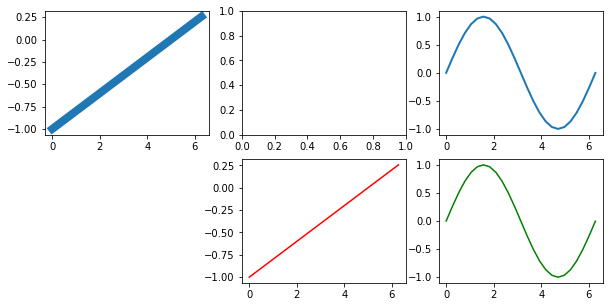

In [14]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(231) # this is the subplot number 1 in a grid with 3 rows and 2 columns 
ax2=fig.add_subplot(232) # this is the subplot number 2 in a grid with 3 rows and 2 columns 
ax3=fig.add_subplot(233) # this is the subplot number 3 in a grid with 3 rows and 2 columns 
# skip the 4th
ax5=fig.add_subplot(235) # this is the subplot number 5 in a grid with 3 rows and 2 columns 
ax6=fig.add_subplot(236) # this is the subplot number 6 in a grid with 3 rows and 2 columns 


ax1.plot(x,y1,lw=8)
ax3.plot(x,y2,lw=2 )
ax5.plot(x,y1,c='r')
ax6.plot(x,y2,c='g')

## controlling the size of the subplots
 `add_axes(rect)`
 
      Add an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height.
 
 This does not work properly on the notebook. save thefigure and check!

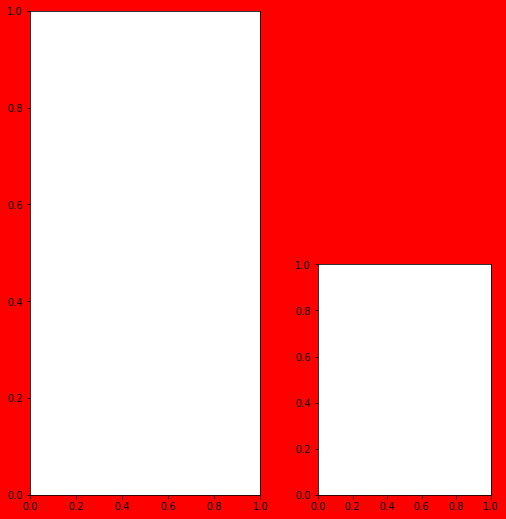

In [15]:
fig=plt.figure(figsize=(6,6),facecolor="r")
ax=fig.add_axes([.1,.1,.4,.84])
ax=fig.add_axes([.6,.1,.3,.4])
fig.set_size_inches(8,8)
fig.savefig("strange_nb.png",facecolor="r")


## limits

(-2, 1.5)

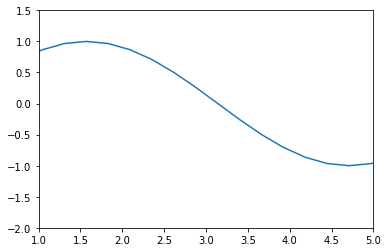

In [16]:
fig,ax=plt.subplots() # subplots return both the fig and one axes
ax.plot(x,y2)
ax.set_xlim(1,5)
ax.set_ylim(-2,1.5)

## labels and title

Text(0.5,0.98,'FIGURE')

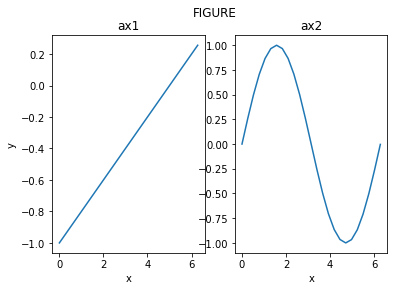

In [17]:
fig,axes=plt.subplots(1,2) # subplots return both the fig and one axes
axes[0].plot(x,y1)
axes[1].plot(x,y2)
axes[0].set_ylabel("y")

for ax in axes:
    ax.set_xlabel("x")
    
axes[0].set_title("ax1")
axes[1].set_title("ax2")
fig.suptitle("FIGURE")

## annotating text

Text(0,0,'NOTE in figure fraction')

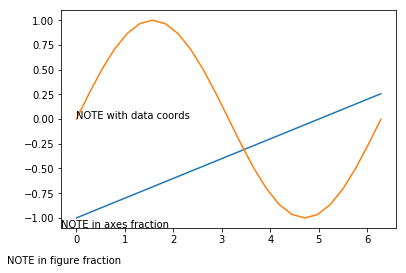

In [18]:
fig,ax=plt.subplots() # subplots return both the fig and one axes
ax.plot(x,y1)
ax.plot(x,y2)

ax.annotate("NOTE with data coords",(0,0))
ax.annotate("NOTE in axes fraction",(0,0),xycoords='axes fraction')
fig.text(s="NOTE in figure fraction",x=0,y=0)

# images

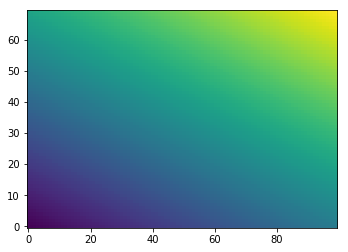

In [19]:
y,x=np.mgrid[0:70,0:100]

z=(2*x+4*y)

fig,ax=plt.subplots()
ax.imshow(z,origin='lower')


## colorbar

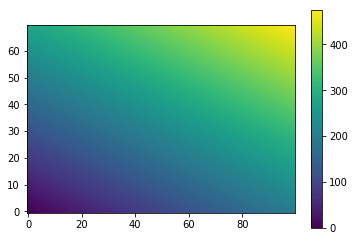

In [20]:
fig,ax=plt.subplots()
im=ax.imshow(z,origin='lower')
fig.colorbar(im)

## vmin and vmax
To control the "display range"

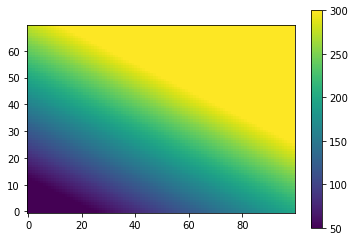

In [21]:
fig,ax=plt.subplots()
im=ax.imshow(z,origin='lower',vmin=50,vmax=300)
fig.colorbar(im)

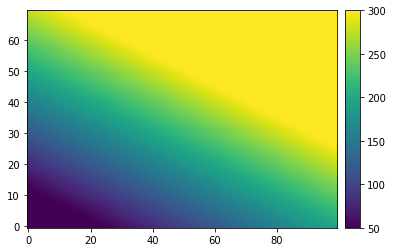

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax=plt.subplots()

im=ax.imshow(z,origin='lower',vmin=50,vmax=300)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(im, cax=cax)

## colormap
https://matplotlib.org/tutorials/colors/colormaps.html

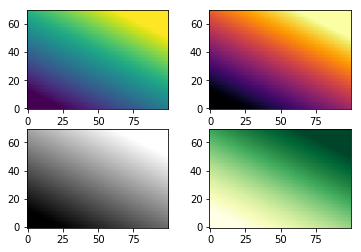

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,axes=plt.subplots(2,2)#,figsize=(7,7))

axes[0,0].imshow(z,origin='lower',vmin=50,vmax=400,cmap=plt.cm.viridis)
axes[0,1].imshow(z,origin='lower',vmin=50,vmax=400,cmap=plt.cm.inferno)
axes[1,0].imshow(z,origin='lower',vmin=50,vmax=400,cmap=plt.cm.gray)
axes[1,1].imshow(z,origin='lower',vmin=50,vmax=400,cmap=plt.cm.YlGn)


# scatter plot
`scatter(x, y, s=None, c=None)``

Make a scatter plot of x vs y.
Marker size is scaled by s and marker color is mapped to c.

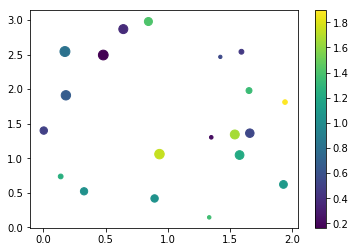

In [24]:
npts=20
x=np.random.uniform(0,2,npts)
y=np.random.uniform(0,3,npts)
z=np.random.uniform(0,2,npts)
s=np.random.uniform(10,100,npts)

fig,ax=plt.subplots()
sc=ax.scatter(x,y,s=s,c=z)
fig.colorbar(sc);

# histogram

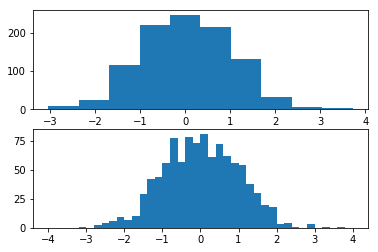

In [25]:
x=np.random.randn(1000)

bins=np.arange(-4,4.1,.2)
fig,axes=plt.subplots(2,1)
n1,bins1,p1=axes[0].hist(x)
n2,bins2,p1=axes[1].hist(x,bins=bins)


Read the pyplot tutorial:
http://matplotlib.org/users/pyplot_tutorial.html